# <center> Machine Learning </center>
# <center> Multilayer Perceptron from Scratch </center>

# About this notebook

This notebook kernel was created to help you understand more about machine learning. I intend to create tutorials with several machine learning algorithms from basic to advanced. I hope I can help you with this data science trail. For any information, you can contact me through the link below.

Contact me: https://www.linkedin.com/in/vitorgamalemos/

**Other noteboks about neural networks:**
  - Simple Perceptron: https://www.kaggle.com/vitorgamalemos/neural-network-01-simple-perceptron
  - Multilayer Perceptron: https://www.kaggle.com/vitorgamalemos/neural-network-02-multilayer-perceptron
  - Convolutional neural network: https://www.kaggle.com/vitorgamalemos/object-recognition-using-convolutional-network
  - GANs: https://www.kaggle.com/vitorgamalemos/generating-digits-with-gans
  
  

# 1. Introduction about Iris Flower

<p style="text-align: justify;">The Iris Flower Dataset, also called Fisher’s Iris, is a dataset introduced by Ronald Fisher, a British statistician, and biologist, with several contributions to science. Ronald Fisher has well known worldwide for his paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It was in this paper that Ronald Fisher introduced the Iris flower dataset.</p>

<p style="text-align: justify;">The iris database consists of 50 samples distributed among three different species of iris. Each of these samples has specific characteristics, which allows them to be classified into three categories: Iris Setosa, Iris Virginica, and Iris versicolor. In this tutorial, we will use multilayer perceptron to separate and classify the iris samples.</p>

- The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor).

- Four features were measured from each sample, the length and the width of the sepals and petals, in centimeters.

- Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

For this example, I will implement a multilayer perceptron without any Python libraries. However, to help us format and manipulate the iris data set, we will use numpy, matplotlib, seaborn, and scikit-learn libraries.

# 2. Artificial Neural Networks

<p style="text-align: justify;">Artificial Neural Networks are mathematical models inspired by the human brain, specifically the ability to learn, process, and perform tasks. The Artificial Neural Networks are powerful tools that assist in solving complex problems linked mainly in the area of combinatorial optimization and machine learning. In this context, artificial neural networks have the most varied applications possible, as such models can adapt to the situations presented, ensuring a gradual increase in performance without any human interference. We can say that the Artificial Neural Networks are potent methods can give computers a new possibility, that is, a machine does not get stuck to preprogrammed rules and opens up various options to learn from its own mistakes. </p>


# 3. How implement a Multilayer Perceptron

## 3.1. Some Python Libraries

<p style="text-align: justify;">In the first place, Let's define some libraries to help us in the manipulation the data set, such as `numpy`, `matplotlib`, `seaborn` and `scikit-learn`. In this tutorial, I am implementing a Multilayer Perceptron without any framework like Keras or similar ones. The goal here is to be as simple as possible! So to help you with this task, we implementing the neural network without using ready-made libraries. You can use numpy to work with array operations! There is no problem it! </p>

In [14]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas
from pandas.plotting import scatter_matrix

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



dataset = pandas.read_csv('./car_evaluation.csv')
car_data = dataset
dataset.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
# scatter_matrix(dataset, alpha=0.5, figsize=(20, 20))
# plt.show()
# from sklearn.datasets import load_diabetes
# car_data = load_diabetes

## 3.2. An analysis about the Iris Flower Dataset


In [15]:
print(car_data)

     Buying  Maint  Doors Persons LugBoot Safety Evaluation
0     vhigh  vhigh      2       2   small    med      unacc
1     vhigh  vhigh      2       2   small   high      unacc
2     vhigh  vhigh      2       2     med    low      unacc
3     vhigh  vhigh      2       2     med    med      unacc
4     vhigh  vhigh      2       2     med   high      unacc
...     ...    ...    ...     ...     ...    ...        ...
1722    low    low  5more    more     med    med       good
1723    low    low  5more    more     med   high      vgood
1724    low    low  5more    more     big    low      unacc
1725    low    low  5more    more     big    med       good
1726    low    low  5more    more     big   high      vgood

[1727 rows x 7 columns]


In [17]:
n_samples, n_features = car_data.shape
print (n_samples,n_features)

# plt.subplot(1, 2, 1)
# scatter_plot = plt.scatter(car_data.data[:,0], car_data.data[:,1], alpha=0.5,
#                            c=car_data.target)
# plt.colorbar(ticks=([0, 1, 2]))
# plt.title('abc')

# plt.subplot(1, 2, 2)
# scatter_plot_2 = plt.scatter(car_data.data[:,2], car_data.data[:,3], alpha=0.5,
#                            c=car_data.target)
# plt.colorbar(ticks=([0, 1, 2]))
# plt.title('rew')

1727 7


In [18]:
# dataset.hist(alpha=0.5, figsize=(20, 20), color='red')
# plt.show()

In [19]:
# dataset.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
# plt.show()

# 4. Manually separating our dataset

It is here that we will select our samples to train and test the algorithms: **80% Training Samples and 20% Test**
<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

In [21]:
X=car_data.drop('Evaluation',axis=1)
y=car_data['Evaluation']
print (X,y)

     Buying  Maint  Doors Persons LugBoot Safety
0     vhigh  vhigh      2       2   small    med
1     vhigh  vhigh      2       2   small   high
2     vhigh  vhigh      2       2     med    low
3     vhigh  vhigh      2       2     med    med
4     vhigh  vhigh      2       2     med   high
...     ...    ...    ...     ...     ...    ...
1722    low    low  5more    more     med    med
1723    low    low  5more    more     med   high
1724    low    low  5more    more     big    low
1725    low    low  5more    more     big    med
1726    low    low  5more    more     big   high

[1727 rows x 6 columns] 0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: Evaluation, Length: 1727, dtype: object


In [22]:
random.seed(123)

def separate_data():
    A = car_dataset[0:40]
    tA = car_dataset[40:50]
    B = car_dataset[50:90]
    tB = car_dataset[90:100]
    C = car_dataset[100:140]
    tC = car_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

train_percent = 80 # percent Training
test_percent = 20 # percent Test
car_dataset = np.column_stack((X,y)) #Join X and Y
car_dataset = list(car_dataset)
random.shuffle(car_dataset)

Filetrain, Filetest = separate_data()

train_X = np.array([i[:4] for i in Filetrain])
train_y = np.array([i[4] for i in Filetrain])
test_X = np.array([i[:4] for i in Filetest])
test_y = np.array([i[4] for i in Filetest])

## 4.1. Plot our training Samples

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# plt.subplot(1, 2, 1)
# plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=cm.viridis)
# plt.xlabel(car_data.feature_names[0])
# plt.ylabel(car_data.feature_names[1])

# plt.subplot(1, 2, 2)
# plt.scatter(train_X[:,2],train_X[:,3],c=train_y,cmap=cm.viridis)
# plt.xlabel(car_data.feature_names[2])
# plt.ylabel(car_data.feature_names[3])

## 4.2. Plot our test Samples

In [25]:
# plt.subplot(1, 2, 1)
# plt.scatter(test_X[:,0],test_X[:,1],c=test_y,cmap=cm.viridis)
# plt.xlabel(car_data.feature_names[0])
# plt.ylabel(car_data.feature_names[1])

# plt.subplot(1, 2, 2)
# plt.scatter(test_X[:,2],test_X[:,3],c=test_y,cmap=cm.viridis)
# plt.xlabel(car_data.feature_names[2])
# plt.ylabel(car_data.feature_names[3])



# 5. Multilayer Perceptron

<p style="text-align: justify;">Artificial neural networks (ANNs) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming. For example, in image recognition, "they might learn to identify images that contain cats by analyzing example images that have been manually labeled as "cat" or "no cat" and using the analytic results to identify cats in other images".</p>

<p style="text-align: justify;">They have found most use in applications difficult to express in a traditional computer algorithm using rule-based programming. An ANN is based on a collection of connected units called artificial neurons, (analogous to axons in a biological brain). Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.</p>

<p style="text-align: justify;"> More information here: [Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network)</p>

<img src="https://miro.medium.com/max/1072/1*DOkHU_dgXMCybA6WWXrp4g.gif"/>

<p style="text-align: justify;">The Multilayer Perceptron Networks are characterized by the presence of many intermediate layers (hidden) in your structure, located between input layer and output layer. With this, such networks have the advantage of being able to classify more than two different classes and It also solve non-linearly separable problems.</p>
<div class="container-fluid"><div class="row">
      <div class="col-md-2" align='center'></div>
      <div class='col-md-8' align='center'>
           <img src='http://ffden-2.phys.uaf.edu/212_fall2003.web.dir/Keith_Palchikoff/multilayer%20perceptron.JPG' />
      </div><div class="col-md-2" align='center'></div>
  </div>
</div>

## 5.1. How does Multilayer Perceptron work?

<p style="text-align: justify;"> We can summarize the operation of the perceptron as follows it:</p>

  - **Step 1**: Initialize the weights and bias with small-randomized values;
  - **Step 2**: Propagate all values in the input layer until output layer(Forward Propagation)
  - **Step 3**: Update weight and bias in the inner layers(Backpropagation)
  - **Step 4**: Do it until that the stop criterion is satisfied !
  
### Step 1: Forward propagation Algorithm
<img src="https://sebastianraschka.com/images/faq/visual-backpropagation/forward-propagation.png">

In order to proceed we need to improve the notation we have been using. That for, for each layer $1\geq l\geq L$, the activations and outputs are calculated as:

$$
\text{L}^l_j = {\sum_i w^l_{ji} x^l_i\, = w^l_{j,0} x^l_0 + w^l_{j,1} x^l_1 + w^l_{j,2} x^l_2 + ... + w^l_{j,n}} x^l_n,
$$
$$Y^l_j = g^l(\text{L}^l_j)\,,$$

$$\{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}$$

where:

* $y^l_j$ is the $j-$th output of layer $l$,
* $x^l_i$ is the $i$-th input to layer $l$,
* $w^l_{ji}$ is the weight of the $j$-th neuron connected to input $i$,
* $\text{L}^l_{j}$ is called net activation, and
* $g^l(\cdot)$ is the activation function of layer $l$.

### Step 2: Calculation our Erro function
<img src="https://miro.medium.com/max/920/1*jYQYuHpHdkZqNFQKJSuDTw.png">
It is used to measure performance locality associated with the results produced by the neurons in output layer and the expected result.
$$
E(k) =
\frac{1}{2} \sum_{k=1}^{K}({{d_j(k)}} - {y_j}{(k)})^2.
$$

### Step 3. Activation Functions
<img src="https://miro.medium.com/max/1192/1*4ZEDRpFuCIpUjNgjDdT2Lg.png">

### Sigmoid Function:

In [26]:
x = 0
ativation = {(lambda x: 1/(1 + np.exp(-x)))}
deriv = {(lambda x: x*(1-x))}

 ### Hyperbolic Tangent Function:

In [27]:
activation_tang = {(lambda x: np.tanh(x))}
deriv_tang = {(lambda x: 1-x**2)}


### ReLU Function:

In [28]:
activation_ReLU = {(lambda x: x*(x > 0))}
deriv_ReLU = {(lambda x: 1 * (x>0))}

### Step 4. Backpropagation Algorithm
<img src="https://sebastianraschka.com/images/faq/visual-backpropagation/backpropagation.png">
### In Output Layer,  $L = 2:$
   - **Step 1**: Calculate error in output layer: $\delta^{(L2)} = -({d_j}^{(L2)} - {y_j}^{(L2)})\cdot
   g'({S_j}^{(L2)})$
   
      `
      ERROR_output = self.OUTPUT - self.OUTPUT_L2
      DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
      `
      

   - **Step 2**: Update all weight between hidden and output layer: $W^{(L2)} = W^{(L2)} -\gamma \cdot(\delta^{(L2)}  - {S_j}^{(L1)})$
   
         for i in range(self.hiddenLayer):`
           ` for j in range(self.OutputLayer):`
               ` self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.output_l1[i]))`
               ` self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])`
               
   - **Step 3**: Update bias value in output layer: $bias^{(L2)} = bias^{(L2)} - \gamma \cdot \delta^{(L2)}$
   
### In Input Layer , $L = 1$:
   - **Step 4**: Calculate error in hidden layer: $\delta^{(L1)} = W^{(L2)} \cdot \delta^{(L2)} \cdot g'({S_j}^{(L1)})$
     
   `delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output) * self.deriv(self._l1)`
   - **Step 5**: Update all weight between hidden and output layer: $W^{(L1)} = W^{(L1)} -\gamma \cdot(\delta^{(L1)}  - {X_i})$
         `for i in range(self.OutputLayer):`
           `for j in range(self.hiddenLayer):`
               `self.WEIGHT_hidden[i][j] -= (self.learningRate * (DELTA_hidden[j] * INPUT[i]))`
               `self.BIAS_hidden[j] -= (self.learningRate * DELTA_hidden[j])`
   - **Step 6**: Update bias value in output layer: $bias^{(L1)} = bias^{(L1)} - \gamma \cdot \delta^{(L1)}$

<img src="https://thumbs.gfycat.com/FickleHorribleBlackfootedferret-small.gif">

# 6. Implementation the Multilayer Perceptron in Python


In [29]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, params=None):
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]

        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3

    pass

    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }

    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))

        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])

        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)

        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])

    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output

        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])

        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0:
                array_score.append([i, 'Iris-setosa', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Iris-versicolour', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                 array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])

        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):
        count_epoch = 1
        total_error = 0
        n = len(X);
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X):
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0):
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}

                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error

                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)

            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)

            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)


            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)

        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()

        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

## Finding the best parameters

<p style="text-align: justify;">For find the best parameters, it was necessary to realize various tests using different values to the parameters. The graphs below denote all tests made to select the best configuration for the multilayer perceptron. These tests were important in selecting the best settings and ensuring the best accuracy. The graph was drawn manually, but you can change the settings and note the results obtained. The tests involve different activation functions and the number of neurons for each layer.</p>

In [30]:
def show_test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "--",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "--",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("% Hits")
    plt.title("Number of Hidden Layers - Performance")

    ep2 = [0,100,200,300,400,500,600,700]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")

    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('% Hits')
    plt.title('Hits - Activation Functions')
    plt.show()

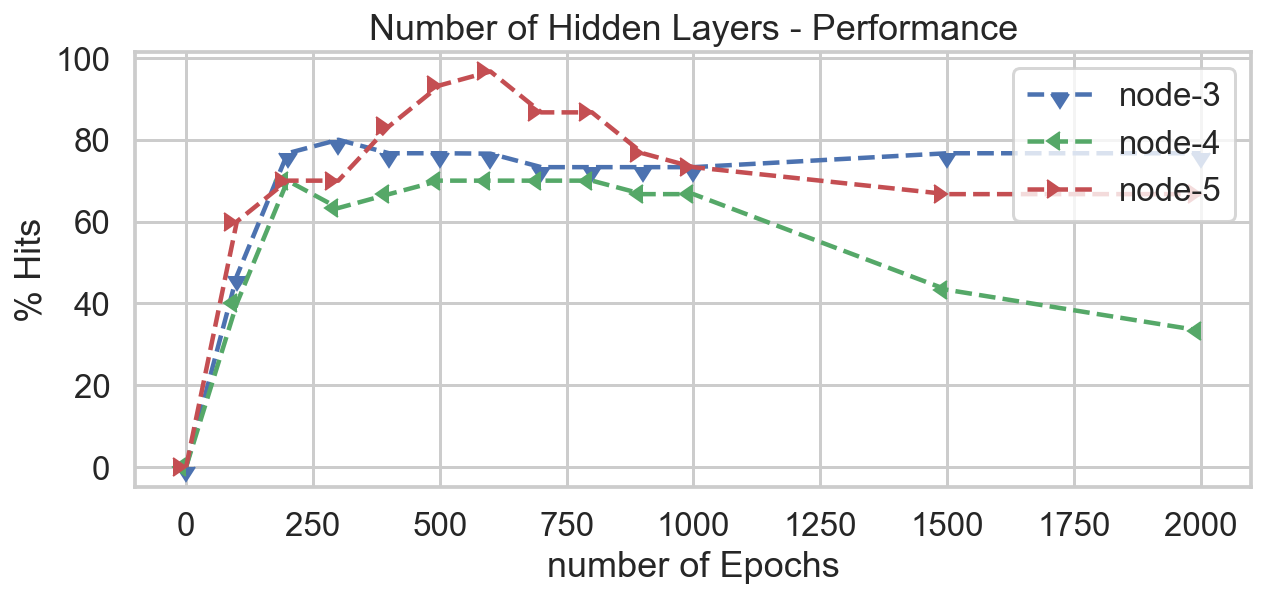

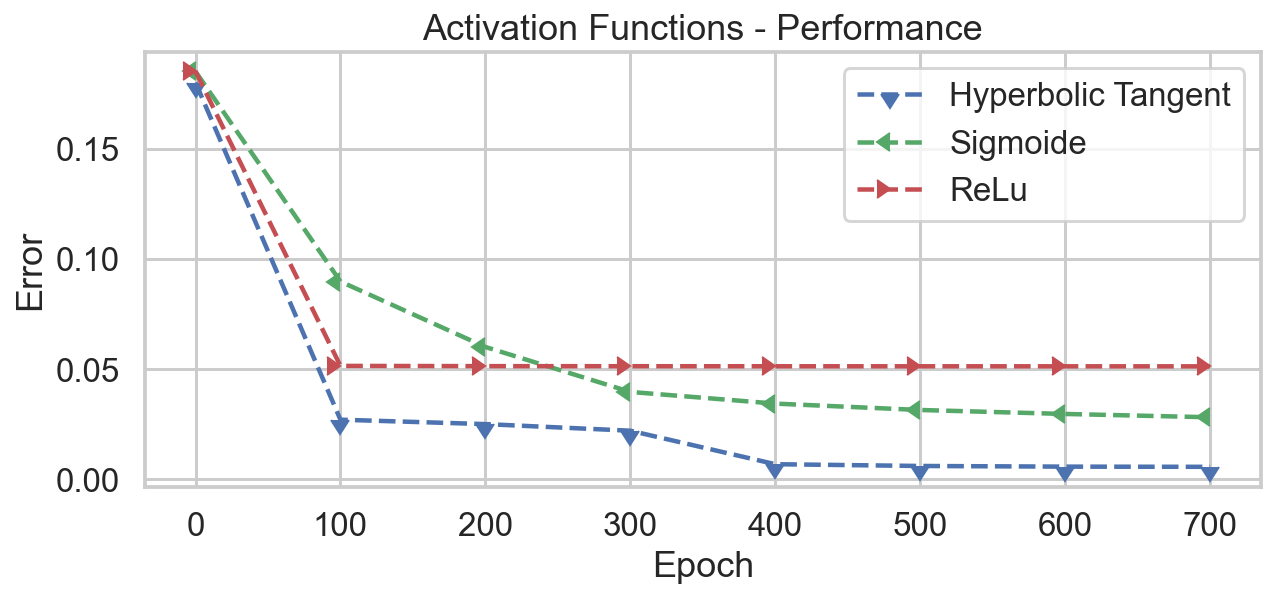

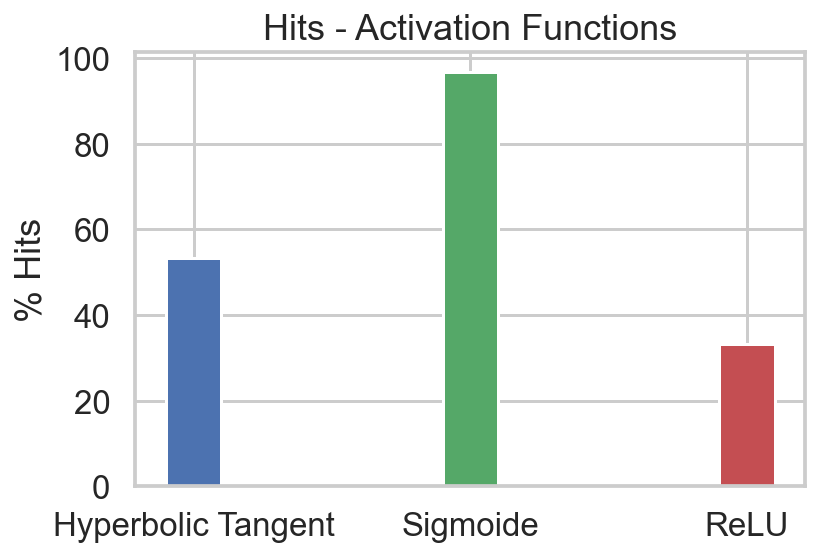

In [31]:
show_test()

# Training the Artificial Neural Network(MLP)

## Step 1: training our MultiLayer Perceptron

In [32]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':700, 'LearningRate':0.005,'BiasHiddenValue':-1,
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

TypeError: can't multiply sequence by non-int of type 'float'

## Step 2: testing our results

In [ ]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1

for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

In [ ]:
dataframe

,_id,class,output,hoped_output
0,0,Iris-setosa,0,0.0
1,1,Iris-versicolour,1,1.0
2,2,Iris-versicolour,1,1.0
3,3,Iris-setosa,0,0.0
4,4,Iris-versicolour,1,1.0
5,5,Iris-versicolour,1,1.0
6,6,Iris-versicolour,1,1.0
7,7,Iris-versicolour,1,1.0
8,8,Iris-setosa,0,0.0
9,9,Iris-virginica,2,2.0


## Step 3. Accuracy and precision the Multilayer Perceptron

Porcents : 96.67 % hits and 3.33 % faults
Total samples of test 150
*Iris-Setosa: 8 samples
*Iris-Versicolour: 16 samples
*Iris-Virginica: 6 samples


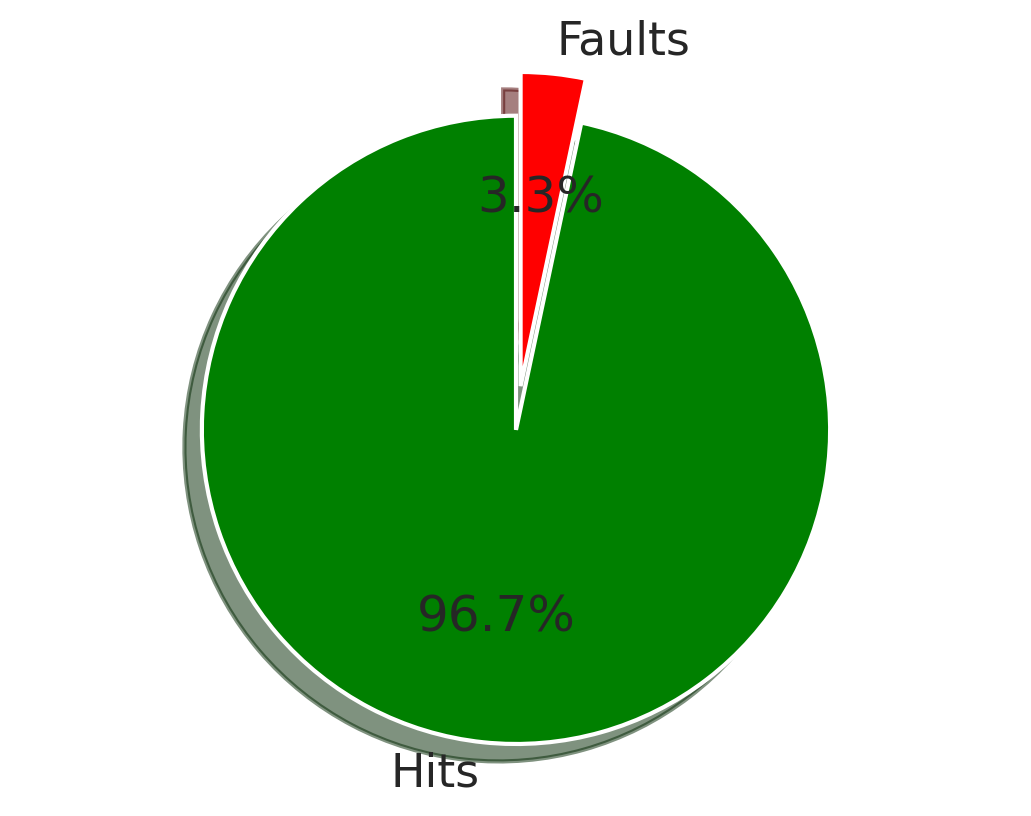

In [ ]:
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",n_samples)
print("*Iris-Setosa:",n_set,"samples")
print("*Iris-Versicolour:",n_vers,"samples")
print("*Iris-Virginica:",n_virg,"samples")

graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Step 4. Score for each one of the samples

- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 93.75 %
- Acurracy Iris-Virginica: 100.00 %


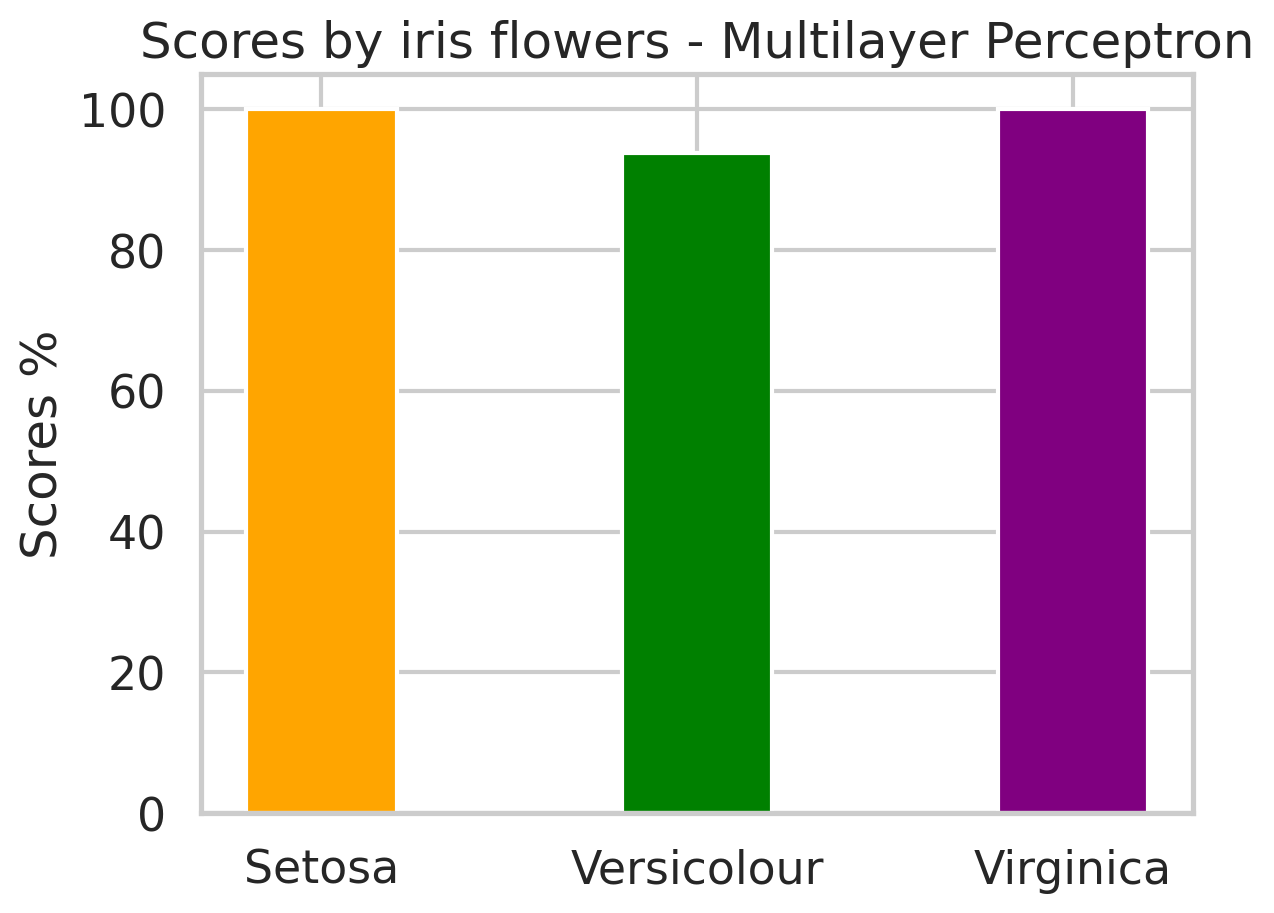

In [ ]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()